In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
labels = os.listdir('../NewDataset/train')

In [4]:
labels

['closed_eyes', 'no_yawn', 'open_eyes', 'yawn']

In [5]:
def face_for_yawn():
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]

    for category in categories:
        path_link = os.path.join("../NewDataset/train", category)
        class_num1 = categories.index(category)
        print(class_num1)

        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)

            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])

    return yaw_no

yawn_no_yawn = face_for_yawn()

0
1


In [6]:
def face_for_eyes():
    eye_data = []
    IMG_SIZE = 145
    eye_labels = ['closed_eyes', 'open_eyes']

    for label in eye_labels:
        path = os.path.join("../NewDataset/train", label)
        class_num = eye_labels.index(label)
        class_num +=2
        print(class_num)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                eye_data.append([resized_array, class_num])

            except Exception as e:
                print(e)

    return eye_data

eye_open_closed = face_for_eyes()

2
3


In [7]:
X = []
y = []
for features, label in yawn_no_yawn:
    X.append(features)
    y.append(label)

for features, label in eye_open_closed:
    X.append(features)
    y.append(label)

In [8]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [10]:
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, test_size = test_size)

In [12]:
len(X_test)

578

In [13]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [14]:
train_generator = ImageDataGenerator(rescale = 1/255, zoom_range = 0.2, horizontal_flip = True, rotation_range = 30)
test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle = False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle = False)

In [15]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation = "relu", input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [16]:
history = model.fit(train_generator, epochs = 50, validation_data = test_generator, shuffle = True, validation_steps = len(test_generator))

Epoch 1/50
43/43 [==============================] - 12s 191ms/step - loss: 1.0156 - accuracy: 0.5664 - val_loss: 0.4789 - val_accuracy: 0.8010
Epoch 2/50
43/43 [==============================] - 7s 166ms/step - loss: 0.4464 - accuracy: 0.8003 - val_loss: 0.3513 - val_accuracy: 0.8633
Epoch 3/50
43/43 [==============================] - 7s 166ms/step - loss: 0.3525 - accuracy: 0.8560 - val_loss: 0.3297 - val_accuracy: 0.8668
Epoch 4/50
43/43 [==============================] - 7s 166ms/step - loss: 0.3392 - accuracy: 0.8612 - val_loss: 0.2348 - val_accuracy: 0.9014
Epoch 5/50
43/43 [==============================] - 7s 166ms/step - loss: 0.2705 - accuracy: 0.8879 - val_loss: 0.2429 - val_accuracy: 0.8945
Epoch 6/50
43/43 [==============================] - 7s 166ms/step - loss: 0.2636 - accuracy: 0.8820 - val_loss: 0.2385 - val_accuracy: 0.9031
Epoch 7/50
43/43 [==============================] - 7s 166ms/step - loss: 0.2680 - accuracy: 0.8924 - val_loss: 0.2255 - val_accuracy: 0.9083
Epoch

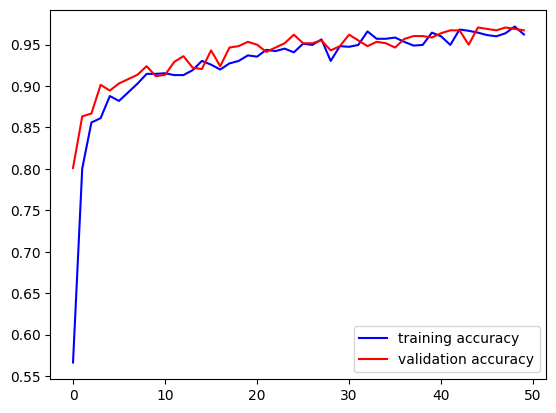

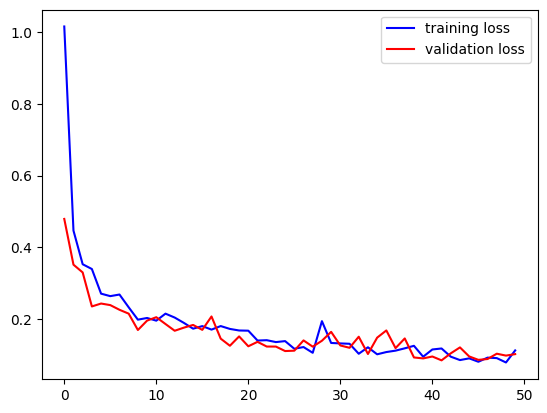

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [18]:
model.save("safedrivemodel.h5")

In [19]:
model.save("safedrivemodel.model")

INFO:tensorflow:Assets written to: safedrivemodel.model\assets


INFO:tensorflow:Assets written to: safedrivemodel.model\assets


In [20]:
prediction = model.predict(X_test)

19/19 [==============================] - 1s 38ms/step


In [21]:
labels_new = ["yawn", "no_yawn", "closed_eyes", "open_eyes"]

In [22]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), prediction.argmax(axis=1), target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.88      0.90      0.89        63
     no_yawn       0.92      0.88      0.90        74
 closed_eyes       0.96      0.98      0.97       215
   open_eyes       0.98      0.96      0.97       226

    accuracy                           0.95       578
   macro avg       0.93      0.93      0.93       578
weighted avg       0.95      0.95      0.95       578



In [23]:
labels_new = ["yawn", "no_yawn", "closed_eyes", "open_eyes"]
IMG_SIZE = 145
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./safedrivemodel.h5")

In [24]:
prediction = model.predict([prepare("../NewDataset/train/no_yawn/1067.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 310ms/step


0

In [25]:
prediction = model.predict([prepare("../NewDataset/train/closed_eyes/_23.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 23ms/step


2

In [26]:
prediction = model.predict([prepare("../NewDataset/train/no_yawn/100.jpg")])
np.argmax(prediction)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [27]:
prediction = model.predict([prepare("../NewDataset/train/yawn/100.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


3

In [28]:
prediction = model.predict([prepare("../NewDataset/train/open_eyes/_100.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


3

In [29]:
prediction = model.predict([prepare("../NewDataset/train/yawn/23.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


2

In [30]:
prediction = model.predict([prepare("../NewDataset/train/open_eyes/_23.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


3

In [31]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_00_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


3

In [32]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_00_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


3

In [33]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_00_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


3

In [34]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_00_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


3

In [35]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_26_58_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 20ms/step


3

In [36]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_00_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 26ms/step


3

In [37]:
prediction = model.predict([prepare("C:\\Users\\Akindu\\Pictures\\Camera Roll\\WIN_20230204_21_27_05_Pro.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 17ms/step


3